### This notebook is to plot hysteresis patterns for all 7 of my summer storms

Import all data -  Constituents, water surface elevation (WSE) and sonde turbidity and fDOM to plot hysteresis

In [73]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

# directories where the CSV files are stored
storm_directory = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms'
sonde_directory = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/sonde'
WSE_directory = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/All_Summer_Storms/WSE'

# dictionaries to store the data frames
storms = {}
sondes = {}
WSE = {}

# iterate over all files in the directory
# storms:
for filename in os.listdir(storm_directory):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(storm_directory, filename) # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['Date/Time'])                # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['Date/Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index   
        df = df.drop(columns=['Date/Time', 'WSE', 'Q'])                 # drop the original date and time columns
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        storms[key] = df                                    # store the data frame in the dictionary

# sondes:
for filename in os.listdir(sonde_directory):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(sonde_directory, filename)
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Date (MM/DD/YYYY)', 'Time (HH:mm:ss)'])
        df['Date_Time'] = pd.to_datetime(df['Date (MM/DD/YYYY)'] + ' ' + df['Time (HH:mm:ss)'])
        df = df.drop(columns=['Date (MM/DD/YYYY)', 'Time (HH:mm:ss)'])  # drop the original date and time columns
        df = df.set_index('Date_Time')  # set date time as the index
        df = df.resample('1T').interpolate()  # resample to 1-minute frequency and interpolate missing values
        key = filename[:-4]
        sondes[key] = df

# WSE:
for filename in os.listdir(WSE_directory):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(WSE_directory, filename)
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Date_Time'])
        df['Date_Time'] = pd.to_datetime(df['Date_Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index
        df = df.resample('1T').interpolate()                # resampling with a 1 min interval
        key = filename[:-4]
        WSE[key] = df

In [13]:
storms.keys()

dict_keys(['st1_down', 'st1_up', 'st2_down', 'st3_down', 'st4_down', 'st4_up', 'st5_down', 'st5_up', 'st6_up', 'st7_down', 'st7_up'])

Cleanup the data - First, I need to add the water depth to each dataframe where they match and convert the WSEs to actual depths

In [74]:
# 2021
WSE['WSE_2021']['P2C_depth'] = (0.5 - (2723.509 - WSE['WSE_2021']['P2C']))* 100 # top elev - WSE = depth, in cm
WSE['WSE_2021']['P3C_depth'] = (0.5 - (2724.488 - WSE['WSE_2021']['P3C']))* 100 
# 2022
WSE['WSE_2022']['P2C_depth'] = (0.5 - (2723.509 - WSE['WSE_2022']['P2C']))* 100 
WSE['WSE_2022']['P3C_depth'] = (0.5 - (2724.488 - WSE['WSE_2022']['P3C']))* 100 
# 2023
WSE['WSE_2023']['P2C_depth'] = (0.5 - (2723.509 - WSE['WSE_2023']['P2C']))* 100 
WSE['WSE_2023']['P3C_depth'] = (0.5 - (2724.488 - WSE['WSE_2023']['P3C']))* 100 

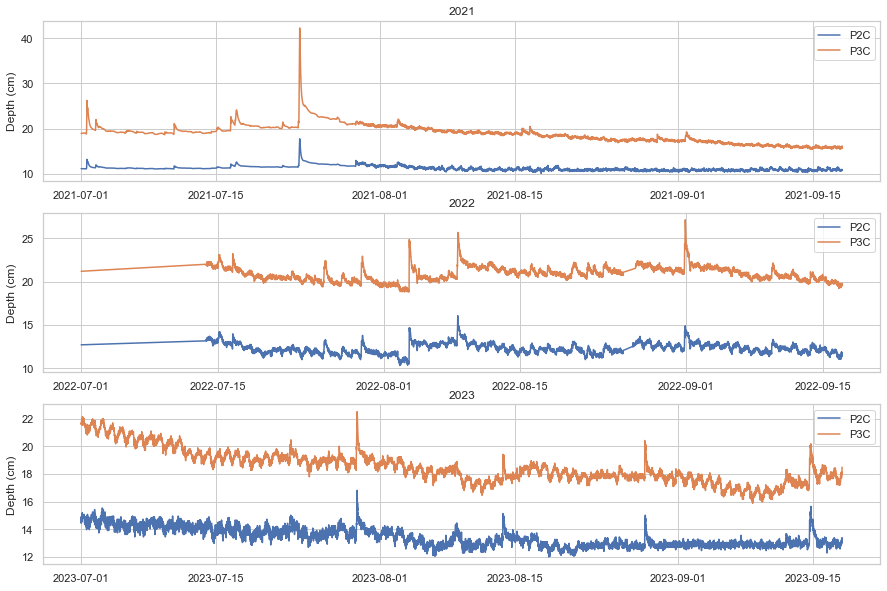

In [75]:
# plot depth time series for each year 
fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=False)
sns.set_theme(style="whitegrid")

# filter for summer months
summer2021 = WSE['WSE_2021'][WSE['WSE_2021'].index.month.isin([7, 8, 9])]
summer2022 = WSE['WSE_2022'][WSE['WSE_2022'].index.month.isin([7, 8, 9])]
summer2023 = WSE['WSE_2023'][WSE['WSE_2023'].index.month.isin([7, 8, 9])]

ax[0].plot(summer2021.index, summer2021['P2C_depth'], label='P2C')
ax[0].plot(summer2021.index, summer2021['P3C_depth'], label='P3C')
ax[0].set_title('2021')
ax[0].set_ylabel('Depth (cm)')
ax[0].legend()

ax[1].plot(summer2022.index, summer2022['P2C_depth'], label='P2C')
ax[1].plot(summer2022.index, summer2022['P3C_depth'], label='P3C')
ax[1].set_title('2022')
ax[1].set_ylabel('Depth (cm)')
ax[1].legend()

ax[2].plot(summer2023.index, summer2023['P2C_depth'], label='P2C')
ax[2].plot(summer2023.index, summer2023['P3C_depth'], label='P3C')
ax[2].set_title('2023')
ax[2].set_ylabel('Depth (cm)')
ax[2].legend()

plt.show()

In [64]:
WSE['WSE_2021'].loc['2021-08-07 20:30:00']

P2C          2723.114830
P3C          2724.222291
P2C_depth      10.583000
P3C_depth      23.429100
Name: 2021-08-07 20:30:00, dtype: float64

In [63]:
WSE['WSE_2023'].loc['2023-06-29 17:50:00']

P2C          2723.177918
P3C          2724.203833
P2C_depth      16.891767
P3C_depth      21.583333
Name: 2023-06-29 17:50:00, dtype: float64

In [11]:
# merge the dataframes on the index - need to make sure storms coincide with the year of the WSE data!

# downstream reach
storms['st1_down'] = storms['st1_down'].merge(WSE['WSE_2021'], left_index=True, right_index=True, how='left')
storms['st2_down'] = storms['st2_down'].merge(WSE['WSE_2022'], left_index=True, right_index=True, how='left')
storms['st3_down'] = storms['st3_down'].merge(WSE['WSE_2022'], left_index=True, right_index=True, how='left')
storms['st4_down'] = storms['st4_down'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st5_down'] = storms['st5_down'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st7_down'] = storms['st7_down'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
# upstream reach
storms['st1_up'] = storms['st1_up'].merge(WSE['WSE_2021'], left_index=True, right_index=True, how='left')
storms['st4_up'] = storms['st4_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st5_up'] = storms['st5_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st6_up'] = storms['st6_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')
storms['st7_up'] = storms['st7_up'].merge(WSE['WSE_2023'], left_index=True, right_index=True, how='left')

In [12]:
storms['st1_down']

,SS (uL/L),SRP (mg/L),TP (mg/L),DOC (mg/L),POC (mg/L),N (mg/L),PP (mg/L),LAB ID,fDOM,Turbidity,P2C,P3C
Date_Time,,,,,,,,,,,,
2021-07-23 15:50:00,339.78248,0.062,0.360,9.18,51.660,NaN,1.19,NaN,249.27,91.20,2723.170033,2724.392682
2021-07-23 16:09:00,457.12000,0.088,0.445,12.63,50.228,NaN,1.63,NaN,236.32,256.63,2723.179359,2724.425603
2021-07-23 16:40:00,152.79000,0.088,0.248,13.39,14.502,NaN,0.77,NaN,377.89,76.14,2723.185071,2724.445766
2021-07-23 16:55:00,168.45000,0.083,0.214,13.00,11.681,NaN,0.50,NaN,413.81,100.94,2723.183121,2724.438883
2021-07-23 19:19:00,43.15000,0.053,0.097,12.87,6.411,NaN,0.10,NaN,515.85,22.13,2723.154470,2724.337737
2021-07-23 21:02:00,17.70000,0.047,0.077,11.55,4.805,NaN,0.07,NaN,506.48,11.14,2723.145268,2724.305254
